# Predicting Employee's Salary using Sklearn Pipline
<br> In this study we will use employee salary data of 40 different countries and will fit different machine learning algorithems to predict the salary of an employee.The data used is downloaded from UCI data repository you can download data and read the data description [here](https://archive.ics.uci.edu/ml/datasets/Adult).

Importing necessary modules for visulizing,data processing and loading the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loaded the data from UCI data repository in test and train dataframe seperatly.

In [2]:
train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',\
                  names=['age','workclass','fnlwgt','education','education-num','marital-status',\
                         'occupation','relationship','race','sex','capital-gain','capital-loss',\
                         'hours-per-week','native-country','salary'])
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1,names=['age','workclass','fnlwgt','education','education-num','marital-status',\
                         'occupation','relationship','race','sex','capital-gain','capital-loss',\
                         'hours-per-week','native-country','salary'])
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Identifying the unexpected observation in data and replacing them with 'NaN'.

In [4]:
train=train.replace(train.workclass.value_counts(dropna=False).index[3],np.NaN)

In [5]:
test=test.replace(test.workclass.value_counts(dropna=False).index[3],np.NaN)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16007 non-null object
salary            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Converting the string categorical columns to numeric columns for machine learning.

In [8]:
cat=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']

In [9]:
train[cat]=train[cat].apply(lambda x:x.astype('category'))

In [10]:
train[cat]=train[cat].apply(lambda x:x.cat.codes)

In [11]:
test[cat]=test[cat].apply(lambda x:x.astype('category'))

In [12]:
test[cat]=test[cat].apply(lambda x:x.cat.codes)

In [13]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [14]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,-1,103497,15,10,4,-1,3,4,0,0,0,30,37,0


In [15]:
train.workclass.value_counts(dropna=False)

 3    22696
 5     2541
 1     2093
-1     1836
 6     1298
 4     1116
 0      960
 7       14
 2        7
Name: workclass, dtype: int64

In [16]:
test.workclass.value_counts(dropna=False)

 3    11210
 5     1321
 1     1043
-1      963
 6      683
 4      579
 0      472
 7        7
 2        3
Name: workclass, dtype: int64

 3 coulmns workclass, occupation and native-country are the only columns which have missing values as -1.

# Machine Learning
<br> Imported necessary modules for machine learning and eveluating the machine learning performance for comparision. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer,FunctionTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

Created the pipeline for missing value imputation and machine learning this is one time work then we just have to change the model in pipeline and it will work fine for that model too.

In [18]:
# now we will try to create the pipline for train data for machine learning and impute values
get_missing_var=FunctionTransformer(lambda x: x[['workclass','occupation','native-country']],validate=False)
missing_var=get_missing_var.fit_transform(train) # no need of this step as we are using this in a pipline.

In [19]:
#otherVar=FunctionTransformer(lambda x: x.drop(['workclass','occupation','native-country'],axis=1),validate=False)
otherVar=FunctionTransformer(lambda x: x.drop(['workclass','occupation','native-country'],axis=1),validate=False)
trainVar=otherVar.fit_transform(train)

In [20]:
step1=[
    ('selector',get_missing_var),
    ('impute',Imputer(missing_values=-1,strategy='most_frequent'))
]
step2=[
    ('selector',otherVar),
    ('impute',Imputer(missing_values='NaN',strategy='mean'))
]
transform=[('missing',Pipeline(step1)),
           ('all',Pipeline(step2))
          ]

In [21]:
logReg=Pipeline([
    ('union',FeatureUnion(transform)),
    ('clf', LogisticRegression())
])

In [22]:
logReg.fit(train.drop('salary',axis=1),train['salary'].values)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('missing', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000000CED1898>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [23]:
logReg.score(train.drop('salary',axis=1),train['salary'].values)

0.79825558183102485

In [24]:
logReg.score(test.drop('salary',axis=1),test['salary'].values)

0.79706406240402927

In [25]:
confusion_matrix(test['salary'].values,logReg.predict(test.drop('salary',axis=1)))

array([[11840,   595],
       [ 2709,  1137]])

In [26]:
print classification_report(test['salary'].values,logReg.predict(test.drop('salary',axis=1)))

             precision    recall  f1-score   support

          0       0.81      0.95      0.88     12435
          1       0.66      0.30      0.41      3846

avg / total       0.78      0.80      0.77     16281



In [27]:
score=[]
score.append(logReg.score(test.drop('salary',axis=1),test['salary'].values))

In [28]:
decTree=Pipeline([
    ('union',FeatureUnion(transform)),
    ('clf', DecisionTreeClassifier())
])

In [29]:
decTree.fit(train.drop('salary',axis=1),train['salary'].values)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('missing', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000000CED1898>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

In [30]:
decTree.score(train.drop('salary',axis=1),train['salary'].values)

0.99996928841251809

In [31]:
decTree.score(test.drop('salary',axis=1),test['salary'].values)

0.80793563048952766

In [32]:
confusion_matrix(test['salary'].values,decTree.predict(test.drop('salary',axis=1)))

array([[10836,  1599],
       [ 1528,  2318]])

In [33]:
print classification_report(test['salary'].values,decTree.predict(test.drop('salary',axis=1)))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87     12435
          1       0.59      0.60      0.60      3846

avg / total       0.81      0.81      0.81     16281



In [34]:
score.append(decTree.score(test.drop('salary',axis=1),test['salary'].values))

In [35]:
NN=Pipeline([
    ('union',FeatureUnion(transform)),
    ('clf', MLPClassifier())
])

In [36]:
NN.fit(train.drop('salary',axis=1),train['salary'].values)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('missing', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000000CED1898>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [37]:
NN.score(test.drop('salary',axis=1),test['salary'].values)

0.7744610281923715

In [38]:
confusion_matrix(test['salary'].values,NN.predict(test.drop('salary',axis=1)))

array([[12408,    27],
       [ 3645,   201]])

In [39]:
score.append(NN.score(test.drop('salary',axis=1),test['salary'].values))

In [40]:
knn=Pipeline([
    ('union',FeatureUnion(transform)),
    ('clf', KNeighborsClassifier())
])

In [41]:
knn.fit(train.drop('salary',axis=1),train['salary'].values)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('missing', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000000CED1898>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [42]:
knn.score(test.drop('salary',axis=1),test['salary'].values)

0.77581229654198147

In [43]:
score.append(knn.score(test.drop('salary',axis=1),test['salary'].values))

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb=Pipeline([
    ('union',FeatureUnion(transform)),
    ('clf', GaussianNB())
])

In [46]:
nb.fit(train.drop('salary',axis=1),train['salary'].values)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('missing', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000000000CED1898>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('...rategy='mean', verbose=0))]))],
       transformer_weights=None)), ('clf', GaussianNB(priors=None))])

In [47]:
nb.score(test.drop('salary',axis=1),test['salary'].values)

0.79509858116823295

In [48]:
score.append(nb.score(test.drop('salary',axis=1),test['salary'].values))

In [49]:
models=['LogisticeReg','DecTree','NN','KNN','NB']

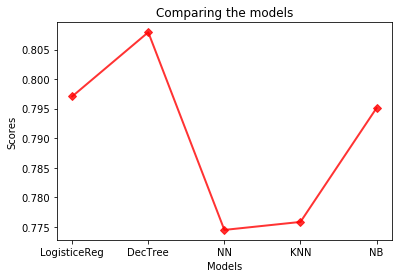

In [50]:
plt.plot(score,marker='D',color='red',alpha=0.8,linewidth=2)
plt.xticks([0,1,2,3,4],models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparing the models')
plt.show()

The graph is drawn between the scores of all models and on the basis of model scores we can conclude that Decision Tree Algorithm perform best among all while KNN performs the least among all models.